# Question 1 (20 pts) (Scikit Not Allowed) -- COMPLETE 
Implement the Expectation Maximization (EM) algorithm for the Gaussian Mixture
Model in python.

sources:
* https://towardsdatascience.com/implement-expectation-maximization-em-algorithm-in-python-from-scratch-f1278d1b9137
* https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

I would count this as the hardest question all term

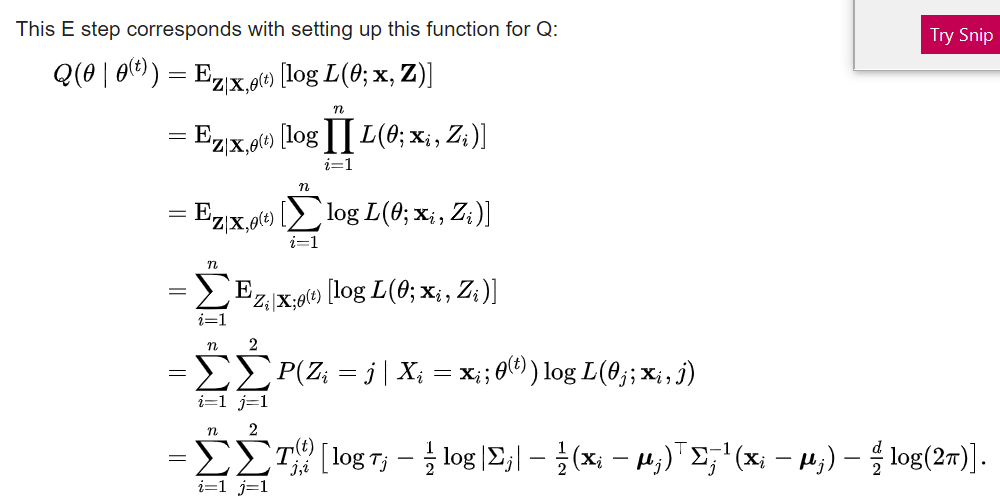

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal as mvn

In [2]:
def init_params():
  p = np.random.random(2)
  p = p / p.sum()
  z = np.random.random((2,2))
  thetas = np.array([np.eye(2)] * 2)

  x = np.concatenate([np.random.multivariate_normal(z, theta, int(pi*100))
                      for pi, z, theta in zip(p, z,thetas)])
  return p, z, thetas, x

p, z, thetas, x = init_params()

In [3]:
def em_gmm(x, p, z, thetas, tol=0.003):
    # initialization of values
    n, t= x.shape
    k = 2
    log_like_o = 0
    log_like_n = 0
    count = 0

    while 1:
      count = count +1
      print("Iteration:" , (count))
      # = ======================================================================
      # e-step -- for each  value of known data find the average until difference convergence near 0
      start = np.zeros((k, n)) # inital guess of 0's
      for j in range(len(z)):
          for i in range(n):
              start[j, i] = p[j] * mvn(z[j], thetas[j]).pdf(x[i])

      start = start / start.sum(0) # find mean 
      # = ======================================================================

      # = ======================================================================
      # m-step
      p = np.zeros(k)
      for j in range(len(z)):
          for i in range(n):
              p[j] = p[j] + start[j, i] #update values given c_ distribution
      p = p / n
      z = np.zeros((k, t)) # initial guess
      for j in range(k):
          for i in range(n):
              z[j] = z[j] + start[j, i] * x[i] # calcuate the max log L
          z[j] = z[j] / start[j, :].sum()

      thetas = np.zeros((k, t, t))
      # extended range guess classifcation of yes/no y's
      for j in range(k):
          for i in range(n):
              y_s = np.reshape(x[i]- z[j], (2,1))
              thetas[j] = thetas[j] + start[j, i] * np.dot(y_s, y_s.T) # update 
          thetas[j] = thetas[j] / start[j,:].sum()
      # = ======================================================================

      # = ======================================================================
      # average log likelyhood
      log_like_n = 0.0
      for i in range(n):
          s = 0
          for j in range(k):
              s += p[j] * mvn(z[j], thetas[j]).pdf(x[i])
          log_like_n = log_like_n + np.log(s)

      print("log_liklyhood = %.3f" % (log_like_n- log_like_o))

      if np.abs(log_like_n - log_like_o) <= tol:
          break # we are done
      log_like_o = log_like_n
      # = ======================================================================

    return log_like_n, p, z, thetas
   

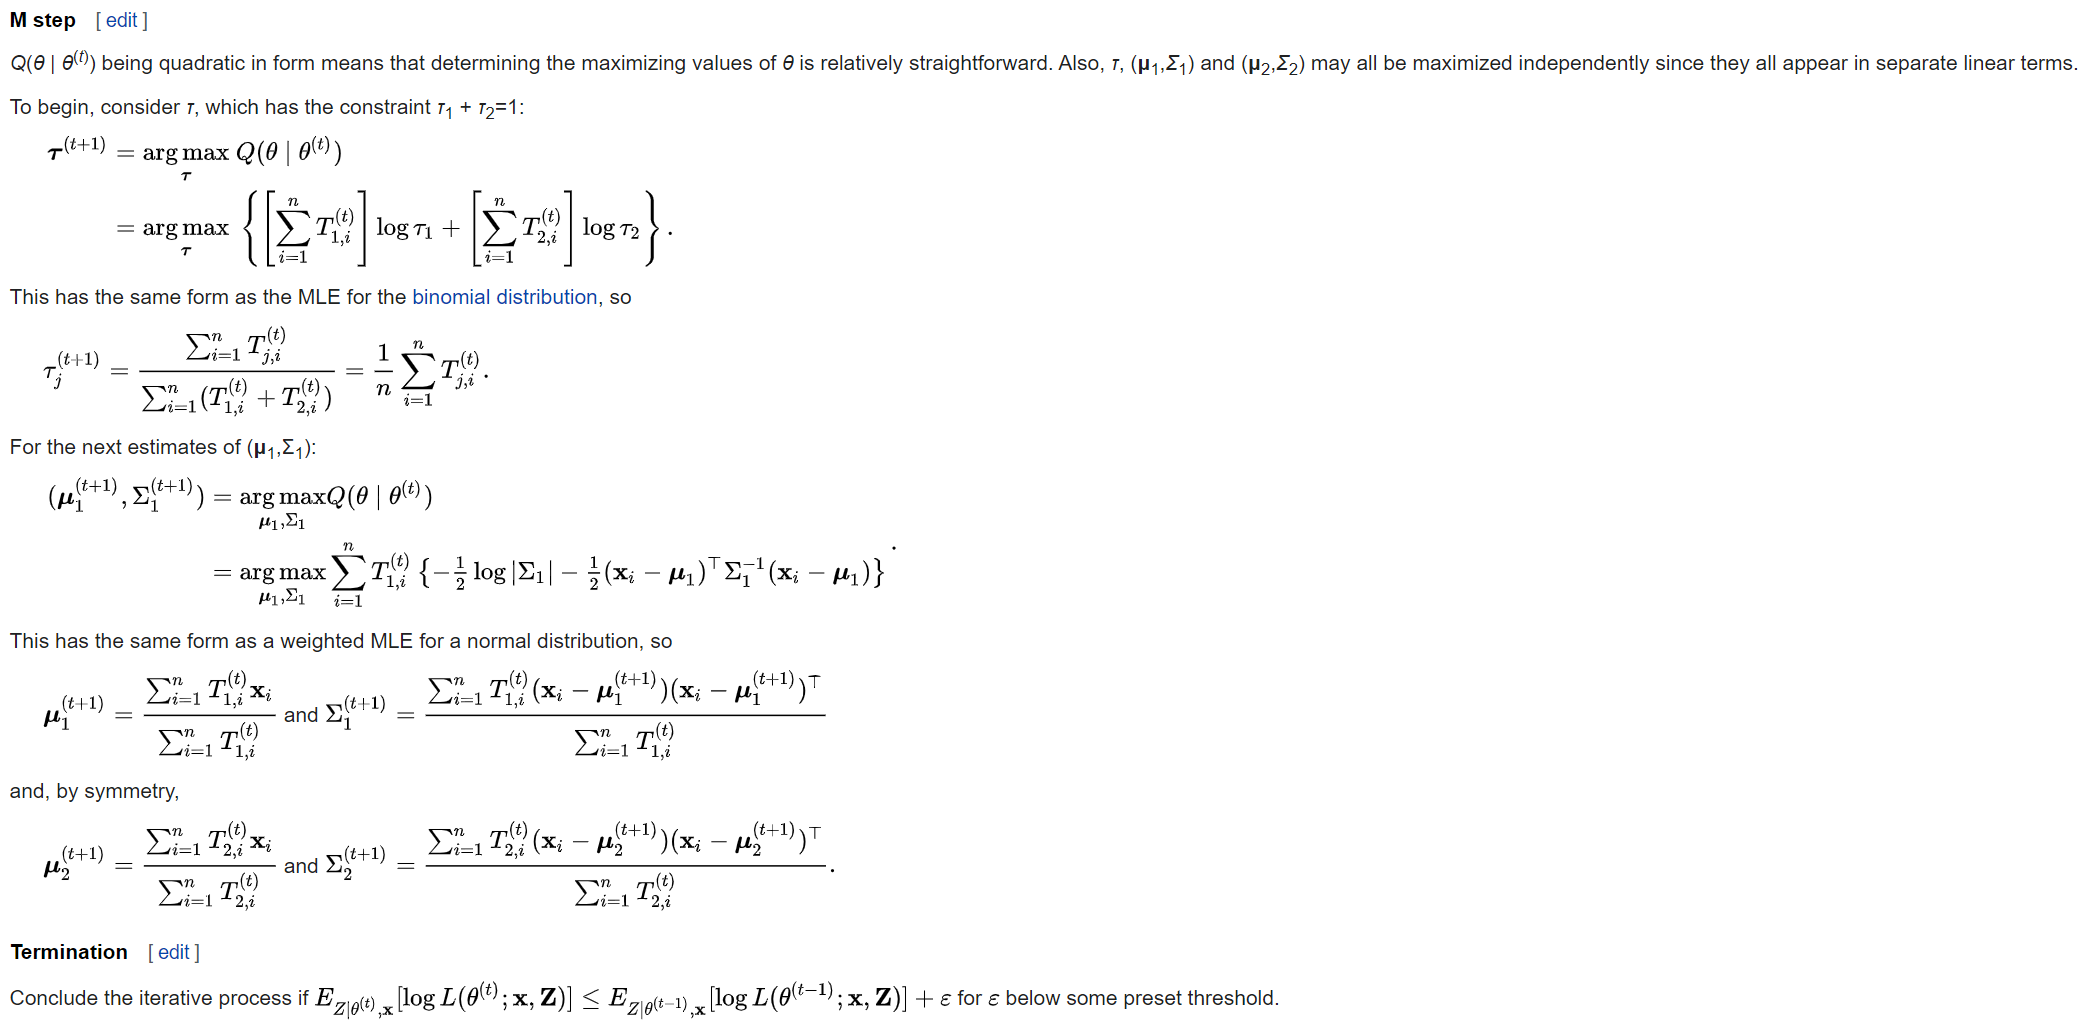

In [4]:
em_gmm(x, p,z,thetas)

Iteration: 1
log_liklyhood = -280.721
Iteration: 2
log_liklyhood = 0.152
Iteration: 3
log_liklyhood = 0.201
Iteration: 4
log_liklyhood = 0.282
Iteration: 5
log_liklyhood = 0.375
Iteration: 6
log_liklyhood = 0.425
Iteration: 7
log_liklyhood = 0.378
Iteration: 8
log_liklyhood = 0.255
Iteration: 9
log_liklyhood = 0.138
Iteration: 10
log_liklyhood = 0.065
Iteration: 11
log_liklyhood = 0.028
Iteration: 12
log_liklyhood = 0.012
Iteration: 13
log_liklyhood = 0.006
Iteration: 14
log_liklyhood = 0.003
Iteration: 15
log_liklyhood = 0.002


(-278.3986366706484,
 array([0.34430332, 0.65569668]),
 array([[-0.07015387,  0.44473301],
        [ 0.60265401,  0.89418814]]),
 array([[[ 0.42208271,  0.27073339],
         [ 0.27073339,  1.0009617 ]],
 
        [[ 1.12523064, -0.16832321],
         [-0.16832321,  0.95405064]]]))